I'm going to predict the closing stock prices of IBM in 2022 based on all its historical data from 2001-2021.

In [8]:
pip install pandas


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/2d/5e/9213ea10ac473e2437dc2cb17323ddc0999997e2713d6a0b683b10773994/pandas-2.1.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/32/4d/aaf7eff5deb402fd9a24a1449a8119f00d74ae9c2efa79f8ef9994261fc2/pytz-2023.3.post1-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/341.8 kB ? eta -:--:--
     ------- ------------------------------- 61.4/341.8 kB 1.6 MB/s eta 0:00:01
     --------------------- ---------------- 194.6/341.8 kB 2.4 MB/s eta 0:00:01
     ---------------------------------- --- 307.2/341.8 kB 2.4 MB/s eta 0:00:01
     -------------------------------------- 341.8/341.8 kB 2.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
    --------------------------------------- 0.2/

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
df = pd.read_csv('MSFT.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-07-23,101.051628,102.246651,100.669212,101.195030,60.314636,6606222
1,2001-07-24,100.239006,101.481834,99.225624,99.913956,59.551090,7635591
2,2001-07-25,99.904396,101.051628,98.212234,100.277245,59.767632,6534990
3,2001-07-26,100.143402,101.338432,98.403442,101.338432,60.400089,8816420
4,2001-07-27,100.143402,101.290634,99.531548,100.095604,59.659351,4546439


In [12]:
df.shape

(5282, 7)

In [34]:
df.std

<bound method DataFrame.std of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2001-07-23  101.051628  102.246651  100.669212  101.195030   60.314636   
2001-07-24  100.239006  101.481834   99.225624   99.913956   59.551090   
2001-07-25   99.904396  101.051628   98.212234  100.277245   59.767632   
2001-07-26  100.143402  101.338432   98.403442  101.338432   60.400089   
2001-07-27  100.143402  101.290634   99.531548  100.095604   59.659351   
...                ...         ...         ...         ...         ...   
2022-07-14  135.600006  139.429993  135.020004  139.059998  139.059998   
2022-07-15  140.679993  140.679993  138.610001  139.919998  139.919998   
2022-07-18  140.149994  140.309998  137.779999  138.130005  138.130005   
2022-07-19  131.580002  132.559998  127.720001  130.880005  130.880005   
2022-07-20  130.699997  130.720001  128.059998  129.179993  129.179993   

      

In [13]:
df.set_index('Date',inplace=True)

In [14]:
training_set = df.loc['2001-01-01':'2021-12-31']['Close'].to_numpy()
test_set = df.loc['2022-01-01':'2022-07-20']['Close'].to_numpy()

In [15]:
scaler = StandardScaler()
training_set = scaler.fit_transform(training_set.reshape(-1,1))

In [19]:
X_train = []
y_train = []

for i in range(120,5145):
    X_train.append(training_set[i-120:i,0])
    y_train.append(training_set[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [20]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) # no. of stock prices, no. of timeseries steps, no. of predictors

In [21]:
regressor = Sequential()

In [22]:
regressor.add(LSTM(units=100,return_sequences=True,input_shape=(X_train.shape[1],1)))

In [23]:
regressor.add(Dropout(0.2))

In [24]:
regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.2))

In [25]:
regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.3))

In [ ]:
regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.2))

In [26]:
regressor.add(LSTM(units=100))
regressor.add(Dropout(0.2))

In [27]:
regressor.add(Dense(units=1))

In [28]:
regressor.compile(loss='mean_squared_error',optimizer='adam')

In [29]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 120, 100)          40800     
                                                                 
 dropout (Dropout)           (None, 120, 100)          0         
                                                                 
 lstm_1 (LSTM)               (None, 120, 100)          80400     
                                                                 
 dropout_1 (Dropout)         (None, 120, 100)          0         
                                                                 
 lstm_2 (LSTM)               (None, 120, 100)          80400     
                                                                 
 dropout_2 (Dropout)         (None, 120, 100)          0         
                                                                 
 lstm_3 (LSTM)               (None, 100)               8

In [30]:
regressor.fit(X_train,y_train,batch_size=32,epochs=20)

Epoch 1/20
158/158 [==============================] - 35s 182ms/step - loss: 0.0502
Epoch 2/20
158/158 [==============================] - 30s 189ms/step - loss: 0.0233
Epoch 3/20
158/158 [==============================] - 29s 182ms/step - loss: 0.0202
Epoch 4/20
158/158 [==============================] - 29s 184ms/step - loss: 0.0176
Epoch 5/20
158/158 [==============================] - 29s 183ms/step - loss: 0.0165
Epoch 6/20
158/158 [==============================] - 30s 190ms/step - loss: 0.0165
Epoch 7/20
158/158 [==============================] - 30s 192ms/step - loss: 0.0134
Epoch 8/20
158/158 [==============================] - 31s 193ms/step - loss: 0.0139
Epoch 9/20
158/158 [==============================] - 31s 196ms/step - loss: 0.0135
Epoch 10/20
158/158 [==============================] - 29s 184ms/step - loss: 0.0119
Epoch 11/20
158/158 [==============================] - 30s 191ms/step - loss: 0.0115
Epoch 12/20
158/158 [==============================] - 30s 189ms/step - lo

In [31]:
inputs = df[len(df)-len(test_set)-120:]['Close'].to_numpy()
inputs_scaled = scaler.transform(inputs.reshape(-1,1))

In [32]:
len(inputs_scaled)

257

In [33]:
X_test = []

for i in range(120,257):
    X_test.append(inputs_scaled[i-120:i,0])

X_test = np.array(X_test)

In [35]:
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [36]:
predicted_stock_prices = regressor.predict(X_test)

5/5 [==============================] - 2s 42ms/step


In [37]:
real_stock_prices = scaler.transform(test_set.reshape(-1,1))

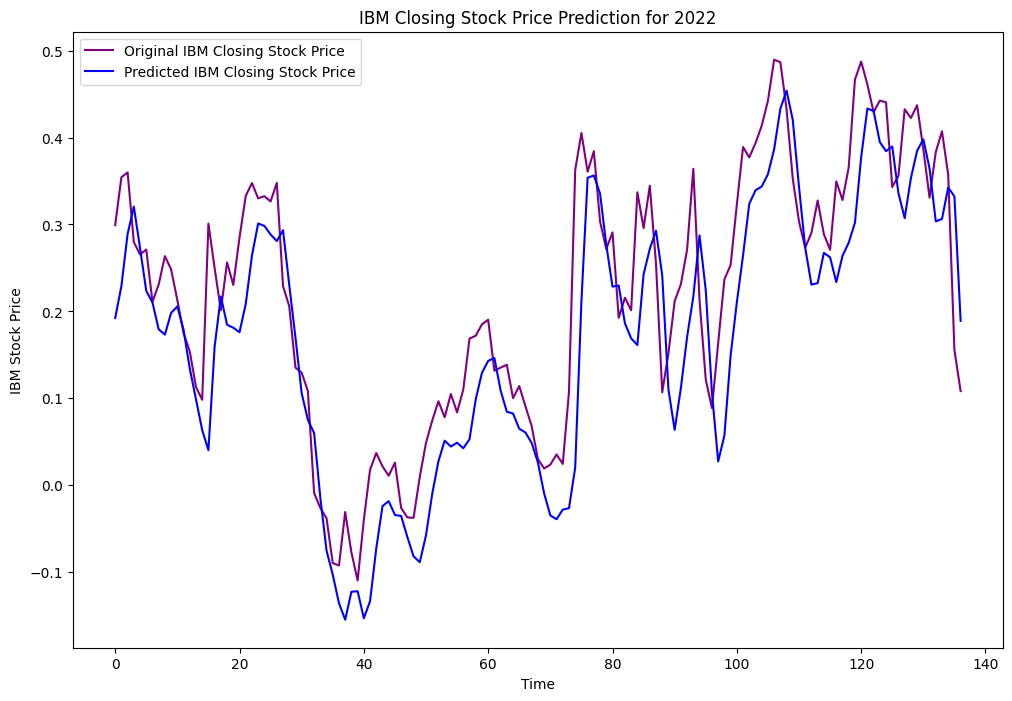

In [38]:
plt.figure(figsize=(12,8))
plt.plot(real_stock_prices,color='purple',label='Original IBM Closing Stock Price')
plt.plot(predicted_stock_prices,color='blue',label='Predicted IBM Closing Stock Price')
plt.title('IBM Closing Stock Price Prediction for 2022')
plt.xlabel('Time')
plt.ylabel('IBM Stock Price')
plt.legend();

In [39]:
print("RMSE:",np.sqrt(mean_squared_error(real_stock_prices,predicted_stock_prices)))
print("R2 Score:",r2_score(real_stock_prices,predicted_stock_prices))

RMSE: 0.08432759691533631
R2 Score: 0.6856024724325132
